   # DATA SCIENCE CAPSTONE PROJECT 
### West Nile Virus in Chicago

The West Nile Virus, a single stranded RNA virus, is known to spread amongst mosquitos.  According to the CDC, It is the leading cause of mosquito-borne disease in the United States. Though fatality is minimal, 1 of 5 people face its symptoms each year. 

Chicago Public Health Workers each year set traps around the city to collect mosquitos and test whether the virus is present in them or not. From 2011-2013, the city of Chicago sprayed its mosquitos so that the number of mosquitos and the virus presence could decrease. The goal is to determine the percentage of its mosquitos containing the West Nile Virus for a given time and location and whether there is a correlation between spraying and virus presence. 


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [2]:
#open the file 
df = pd.read_csv('train.csv')
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
#get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [4]:
#find dataset shape
df.shape

(10506, 12)

In [5]:
#determine number of missing values in each column
null_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
null_values.columns=['Count', '%']
null_values.sort_values(by='Count')
null_values

,Count,%
Date,0,0.0
Address,0,0.0
Species,0,0.0
Block,0,0.0
Street,0,0.0
Trap,0,0.0
AddressNumberAndStreet,0,0.0
Latitude,0,0.0
Longitude,0,0.0
AddressAccuracy,0,0.0


No null or missing values are present in this data

#### Analyze the dates in which mosquitoes were collected

In [6]:
df['Date'].unique()
np.count_nonzero(df['Date'].unique())

95

In [7]:
df_date = df['Date'].value_counts()
df_date

2007-08-01    551
2007-08-15    276
2007-08-24    186
2007-08-21    186
2013-08-01    186
             ... 
2007-10-09     26
2007-05-29     25
2007-09-25     23
2009-06-03     14
2007-08-03      5
Name: Date, Length: 95, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Count'>

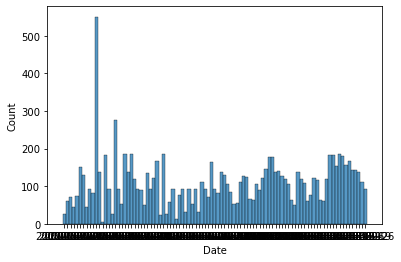

In [8]:
sns.histplot(data = df_date, x=df['Date'], bins=100) 
# A high number of collections were done on  August 1, 2007

#### Analyze locations of where mosquitoes were trapped 

In [9]:
df['Block'].unique()

array([41, 62, 79, 15, 25, 11, 21, 22, 17, 53, 65, 75, 89, 91, 36, 72, 38,
       49, 58, 50, 14, 10, 42, 40, 43, 28, 18, 70, 35, 93, 37, 45, 46, 60,
       61, 27, 68, 30, 96, 64, 12, 20, 33, 52, 67, 73, 39, 47, 55, 71, 77,
       63, 13, 81, 24, 80, 82, 98, 66, 48, 51, 90, 29, 34])

In [10]:
np.count_nonzero(df['Block'].unique())

64

In [11]:
np.count_nonzero(df['Street'].unique())

128

In [12]:
np.count_nonzero(df['Address'].unique())

138

In [13]:
df['AddressAccuracy'].unique() # On a scaled of 0-9 where 9 is the most accurate and 0 is the least accurate

array([9, 8, 5, 3])

#### Analyze the prescence of the West Nile Virus
1 is denoted as the virus present and 0 is denoted as the virus is not present

In [14]:
df['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [15]:
#calcualte the percentage of virus
(551/10506)*100

5.244622120692937

In [16]:
data_mos_count = df['NumMosquitos'].value_counts()

<AxesSubplot:xlabel='NumMosquitos', ylabel='Count'>

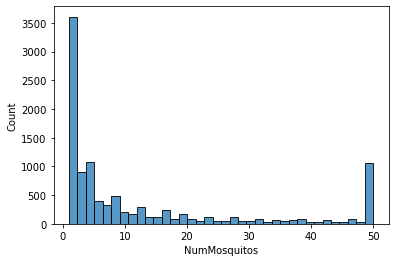

In [17]:
sns.histplot(data = data_mos_count, x=df['NumMosquitos'])

#### Analyze the different species of the West Nile Virus

In [18]:
df['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [19]:
df[(df['Species'] == 'CULEX PIPIENS/RESTUANS') & (df['NumMosquitos'] == 1)].count()
773/4752*100

16.266835016835017

In [20]:
df[(df['Species'] == 'CULEX RESTUANS') & (df['NumMosquitos'] == 1)].count()
770/2740*100

28.102189781021895

In [21]:
df[(df['Species'] == 'CULEX PIPIENS') & (df['NumMosquitos'] == 1)].count()
545/2699*100

20.192663949610967

In [22]:
df[(df['Species'] == 'CULEX TERRITANS') & (df['NumMosquitos'] == 1)].count()
153/222*100

68.91891891891892

In [23]:
df[(df['Species'] == 'CULEX SALINARIUS') & (df['NumMosquitos'] == 1)].count()
61/86*100

70.93023255813954

In [24]:
df[(df['Species'] == 'CULEX TARSALIS') & (df['NumMosquitos'] == 1)].count()
5/6*100

83.33333333333334

In [25]:
df[(df['Species'] == 'CULEX ERRATICUS') & (df['NumMosquitos'] == 1)].count()
0/1*100

0.0

<AxesSubplot:xlabel='count', ylabel='Species'>

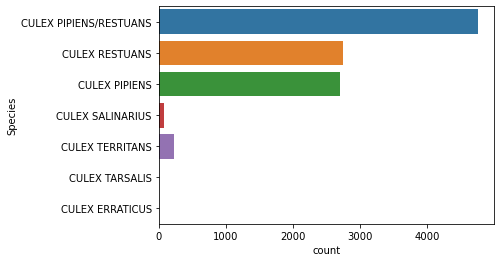

In [26]:
sns.countplot(y=df['Species'])

In [27]:
wnv_df = pd.DataFrame(data=df, columns= ['Date','Species','NumMosquitos','WnvPresent'])
wnv_df

,Date,Species,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,1,0
1,2007-05-29,CULEX RESTUANS,1,0
2,2007-05-29,CULEX RESTUANS,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,1,0
4,2007-05-29,CULEX RESTUANS,4,0
...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,6,1
10502,2013-09-26,CULEX PIPIENS/RESTUANS,5,0
10503,2013-09-26,CULEX PIPIENS/RESTUANS,1,0
10504,2013-09-26,CULEX PIPIENS/RESTUANS,5,0


#### Look into the Weather Data

In [28]:
weather = pd.read_csv('weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [30]:
weather.shape

(2944, 22)

In [31]:
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
0.62       1
2.03       1
1.44       1
1.35       1
1.26       1
Name: PrecipTotal, Length: 168, dtype: int64

In [32]:
weather['PrecipTotal'].value_counts()  
weather['PrecipTotal'] = weather['PrecipTotal'].replace({'M':0.00,'  T':0.00}) 
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)
weather['PrecipTotal'].unique()

array([0.  , 0.13, 0.02, 0.38, 0.6 , 0.14, 0.07, 0.11, 0.09, 1.01, 0.28,
       0.04, 0.08, 0.01, 0.53, 0.19, 0.21, 0.32, 0.39, 0.31, 0.42, 0.27,
       0.16, 0.58, 0.93, 0.05, 0.34, 0.15, 0.35, 0.4 , 0.66, 0.3 , 0.24,
       0.43, 1.55, 0.92, 0.89, 0.17, 0.03, 1.43, 0.97, 0.26, 1.31, 0.06,
       0.46, 0.29, 0.23, 0.41, 0.45, 0.83, 1.33, 0.91, 0.48, 0.37, 0.88,
       2.35, 1.96, 0.2 , 0.25, 0.18, 0.67, 0.36, 0.33, 1.28, 0.74, 0.76,
       0.71, 0.95, 1.46, 0.12, 0.52, 0.64, 0.22, 1.24, 0.72, 0.73, 0.65,
       1.61, 1.22, 0.5 , 1.05, 2.43, 0.59, 2.9 , 2.68, 1.23, 0.62, 6.64,
       3.07, 1.44, 1.75, 0.82, 0.8 , 0.86, 0.63, 0.55, 1.03, 0.7 , 1.73,
       1.38, 0.44, 1.14, 1.07, 3.97, 0.87, 0.78, 1.12, 0.68, 0.1 , 0.61,
       0.54, 1.19, 0.75, 0.84, 1.29, 0.81, 1.15, 1.49, 1.57, 1.02, 1.3 ,
       0.51, 0.85, 0.79, 0.77, 2.79, 3.15, 3.64, 4.73, 1.6 , 0.57, 2.24,
       1.9 , 1.06, 1.88, 0.69, 2.17, 6.86, 0.49, 1.11, 1.21, 0.9 , 1.34,
       0.47, 0.56, 3.66, 1.09, 1.25, 1.35, 2.2 , 1.

In [33]:
weather['Tavg'].value_counts()
weather['Tavg'] = weather['Tavg'].replace('M',67)
weather['Tavg'] = weather['Tavg'].astype(int)

In [34]:
weather['Tavg'].mean()

67.23913043478261

In [35]:
#station_one = pd.DataFrame(weather[(weather['Station'] == 1)])
#station_one.plot.scatter(x='Date', y='Tavg')

In [36]:
#station_two = weather[(weather['Station'] == 2)]
#station_two.plot.scatter(x='Date', y='Tavg')
#combine both stations using groupby function axis should be 0

Station 1 and 2 are the Aiport Locations in Chicago. Station 1 is Chicago O'Hare International Airport and Station 2 is Chicago Midway International Airport. Both stations seem to have similar tempertaure and changes. Therefore the average of the two stations can be taken generalize the collections at the two airports. 

In [37]:
weather['Date'].value_counts()

2010-06-18    2
2008-05-26    2
2008-09-11    2
2008-09-09    2
2011-07-06    2
             ..
2009-07-26    2
2008-09-03    2
2009-09-11    2
2012-07-21    2
2013-09-13    2
Name: Date, Length: 1472, dtype: int64

In [38]:
df_virus = df[df['NumMosquitos'] == 1]
virus_dates = df_virus['Date'].unique()

In [77]:
weather_df = pd.DataFrame(data=weather,columns=['Station','Date','Tmax','Tmin','Tavg','PrecipTotal'])
weather_df= pd.DataFrame(weather_df[(weather_df['Station'] == 1)])
weather_df

,Station,Date,Tmax,Tmin,Tavg,PrecipTotal
0,1,2007-05-01,83,50,67,0.00
2,1,2007-05-02,59,42,51,0.00
4,1,2007-05-03,66,46,56,0.00
6,1,2007-05-04,66,49,58,0.00
8,1,2007-05-05,66,53,60,0.00
...,...,...,...,...,...,...
2934,1,2014-10-27,77,51,64,0.00
2936,1,2014-10-28,68,45,57,0.00
2938,1,2014-10-29,49,36,43,0.00
2940,1,2014-10-30,51,32,42,0.00


Combine the dataframes

In [78]:
df_final = wnv_df.merge(weather_df, on='Date')
df_final

,Date,Species,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal
0,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,1,88,60,74,0.0
1,2007-05-29,CULEX RESTUANS,1,0,1,88,60,74,0.0
2,2007-05-29,CULEX RESTUANS,1,0,1,88,60,74,0.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,1,88,60,74,0.0
4,2007-05-29,CULEX RESTUANS,4,0,1,88,60,74,0.0
...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,6,1,1,75,50,63,0.0
10502,2013-09-26,CULEX PIPIENS/RESTUANS,5,0,1,75,50,63,0.0
10503,2013-09-26,CULEX PIPIENS/RESTUANS,1,0,1,75,50,63,0.0
10504,2013-09-26,CULEX PIPIENS/RESTUANS,5,0,1,75,50,63,0.0


In [79]:
#df_final_wnv_present = df_final[df_final['WnvPresent'] == 1]
#print(df_final_wnv_present['Tavg'].mean())
#df_final_wnv_notpresent = df_final[df_final['WnvPresent'] == 0]
#print(df_final_wnv_notpresent['Tavg'].mean())

In [80]:
df_final[df_final['Tavg'] > 75]

,Date,Species,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal
85,2007-06-26,CULEX PIPIENS/RESTUANS,1,0,1,92,70,81,0.16
86,2007-06-26,CULEX RESTUANS,4,0,1,92,70,81,0.16
87,2007-06-26,CULEX SALINARIUS,1,0,1,92,70,81,0.16
88,2007-06-26,CULEX PIPIENS/RESTUANS,1,0,1,92,70,81,0.16
89,2007-06-26,CULEX RESTUANS,4,0,1,92,70,81,0.16
...,...,...,...,...,...,...,...,...,...
10409,2013-09-19,CULEX PIPIENS,4,0,1,84,69,77,0.84
10410,2013-09-19,CULEX PIPIENS,21,0,1,84,69,77,0.84
10411,2013-09-19,CULEX PIPIENS,15,0,1,84,69,77,0.84
10412,2013-09-19,CULEX PIPIENS/RESTUANS,2,0,1,84,69,77,0.84


In [81]:
#One Hot Encoding on the Species Column 
df_final = pd.get_dummies(df_final, columns=['Species'], prefix='C')
df_final

,Date,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS
0,2007-05-29,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0
1,2007-05-29,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0
2,2007-05-29,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0
3,2007-05-29,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0
4,2007-05-29,4,0,1,88,60,74,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,6,1,1,75,50,63,0.0,0,0,1,0,0,0,0
10502,2013-09-26,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0
10503,2013-09-26,1,0,1,75,50,63,0.0,0,0,1,0,0,0,0
10504,2013-09-26,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0


In [82]:
df_final['Date']=pd.to_datetime(df_final['Date'],format='%Y-%m-%d', errors='coerce')
df_final['Date_Month']=df_final['Date'].apply(lambda x : x.month)
df_final['Date_Month'].value_counts()

8     3751
7     2606
9     2218
6     1571
10     276
5       84
Name: Date_Month, dtype: int64

Majority of the collections were collected during the Summer time, between June-August. Other collections were taken later during the spring and early in the fall. No collections were done during the winter months.

In [83]:
df_final = df_final.drop(columns='Date')
#create lag vairables
df_final

,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS,Date_Month
0,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0,5
1,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0,5
2,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0,5
3,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0,5
4,4,0,1,88,60,74,0.0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,6,1,1,75,50,63,0.0,0,0,1,0,0,0,0,9
10502,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0,9
10503,1,0,1,75,50,63,0.0,0,0,1,0,0,0,0,9
10504,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0,9


In [84]:
df_final.dtypes
#df_final['Date_Month'] = df_final['Date_Month'].astype(int)
#df_final['PrecipTotal'] = df_final['PrecipTotal'].astype(int)

NumMosquitos                  int64
WnvPresent                    int64
Station                       int64
Tmax                          int64
Tmin                          int64
Tavg                          int64
PrecipTotal                 float64
C_CULEX ERRATICUS             uint8
C_CULEX PIPIENS               uint8
C_CULEX PIPIENS/RESTUANS      uint8
C_CULEX RESTUANS              uint8
C_CULEX SALINARIUS            uint8
C_CULEX TARSALIS              uint8
C_CULEX TERRITANS             uint8
Date_Month                    int64
dtype: object

Random under-sampling:
1    551
0    551
Name: WnvPresent, dtype: int64


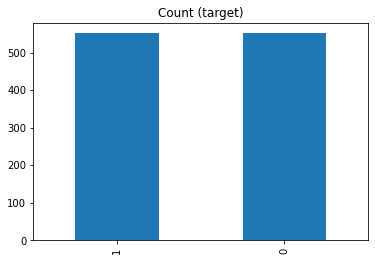

In [85]:
#Undersampling Data

X_sample, y_sample = df_final.WnvPresent.value_counts()

# Divide by class
df_X = df_final[df_final['WnvPresent'] == 0]
df_y = df_final[df_final['WnvPresent'] == 1]

df_X_under = df_X.sample(y_sample)
df_test_under = pd.concat([df_X_under, df_y], axis=0)

print('Random under-sampling:')
print(df_test_under.WnvPresent.value_counts())

df_test_under.WnvPresent.value_counts().plot(kind='bar', title='Count (target)');


In [86]:
df_test_under

,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS,Date_Month
1077,6,0,1,92,69,81,0.00,0,1,0,0,0,0,0,8
5394,2,0,1,86,60,73,0.00,0,0,1,0,0,0,0,8
3217,1,0,1,88,63,76,0.00,0,0,0,0,0,0,1,9
4195,3,0,1,86,65,76,3.97,0,0,0,1,0,0,0,6
5719,2,0,1,84,58,71,0.00,0,0,1,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,27,1,1,84,69,77,0.84,0,0,1,0,0,0,0,9
10439,3,1,1,75,50,63,0.00,0,1,0,0,0,0,0,9
10462,4,1,1,75,50,63,0.00,0,0,1,0,0,0,0,9
10484,39,1,1,75,50,63,0.00,0,0,1,0,0,0,0,9


### run test and calcualte aoc score
- XgBoost

- Grid Search CV 


In [87]:
from sklearn.model_selection import train_test_split

X = df_test_under.drop('WnvPresent', axis=1)
y = df_test_under[['WnvPresent']]
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = 0.75, test_size=0.25,random_state=1)

In [88]:
#Logsitic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[307  99]
 [149 271]]
0.6997578692493946
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       406
           1       0.73      0.65      0.69       420

    accuracy                           0.70       826
   macro avg       0.70      0.70      0.70       826
weighted avg       0.70      0.70      0.70       826



<AxesSubplot:>

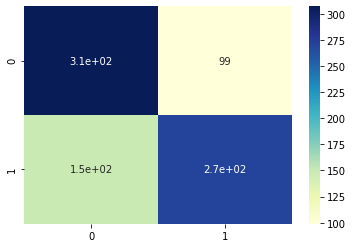

In [89]:
predictions_logreg=logreg.predict(X_test)
print(confusion_matrix(y_test, predictions_logreg))
print(accuracy_score(y_test, predictions_logreg))
print(classification_report(y_test, predictions_logreg))

sns.heatmap(confusion_matrix(y_test, predictions_logreg),annot=True,cmap ="YlGnBu")

In [90]:
#Random Forrest Classifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
predictions_rfc = model_res.predict(X_test)

<ipython-input-90-b429a9a26529>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = rfc.fit(X_train, y_train)


[[302 104]
 [115 305]]
0.7348668280871671
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       406
           1       0.75      0.73      0.74       420

    accuracy                           0.73       826
   macro avg       0.73      0.74      0.73       826
weighted avg       0.74      0.73      0.73       826



<AxesSubplot:>

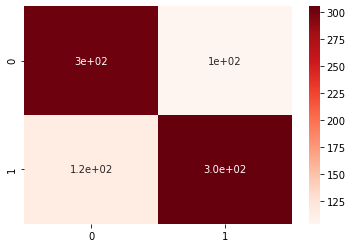

In [91]:
print(confusion_matrix(y_test, predictions_rfc))
print(accuracy_score(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

sns.heatmap(confusion_matrix(y_test, predictions_rfc),annot=True,cmap ="Reds")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[298 108]
 [ 94 326]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       406
           1       0.75      0.78      0.76       420

    accuracy                           0.76       826
   macro avg       0.76      0.76      0.76       826
weighted avg       0.76      0.76      0.76       826



<AxesSubplot:>

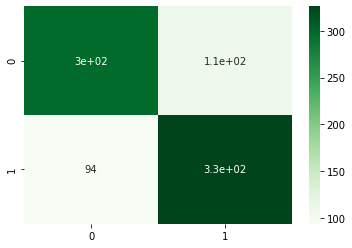

In [105]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 20, random_state = 0)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

print(confusion_matrix(y_test, predictions_gb))
print(classification_report(y_test, predictions_gb))

sns.heatmap(confusion_matrix(y_test, predictions_gb),annot=True,cmap ="Greens")

In [108]:
#Accuracy Scores of the different test
print("Logistic Regression: %.2f%%" % (accuracy_score(y_test, predictions_logreg) * 100.0))
print("Random Forrest Classifier: %.2f%%" % (accuracy_score(y_test, predictions_rfc) * 100.0))
print("Gradient Boosting: %.2f%%" % (accuracy_score(y_test, predictions_gb) * 100.0))

Logistic Regression: 69.98%
Random Forrest Classifier: 73.49%
Gradient Boosting: 75.54%


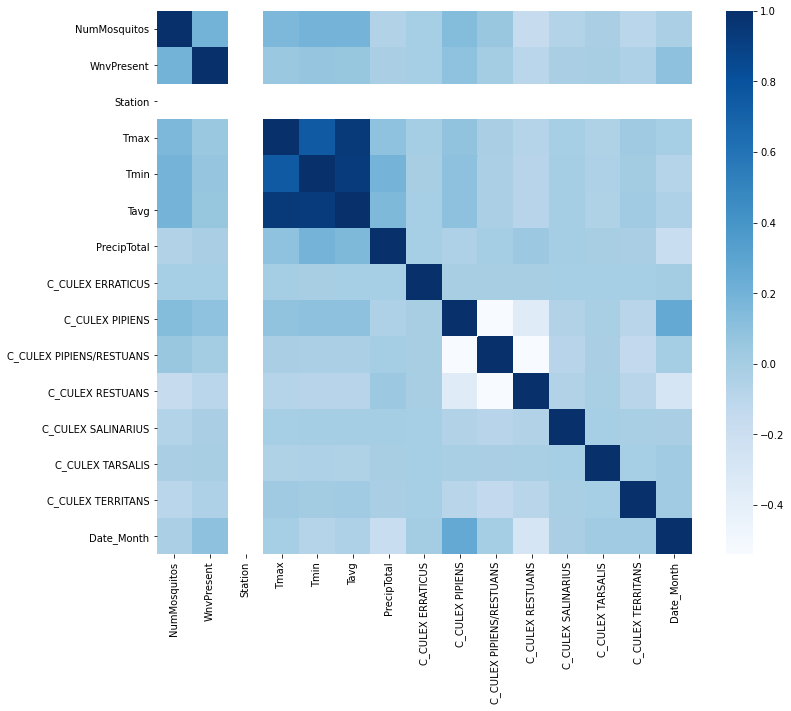

In [101]:
#Correlation plot of the Original Data
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(),cmap ='Blues')
plt.show()

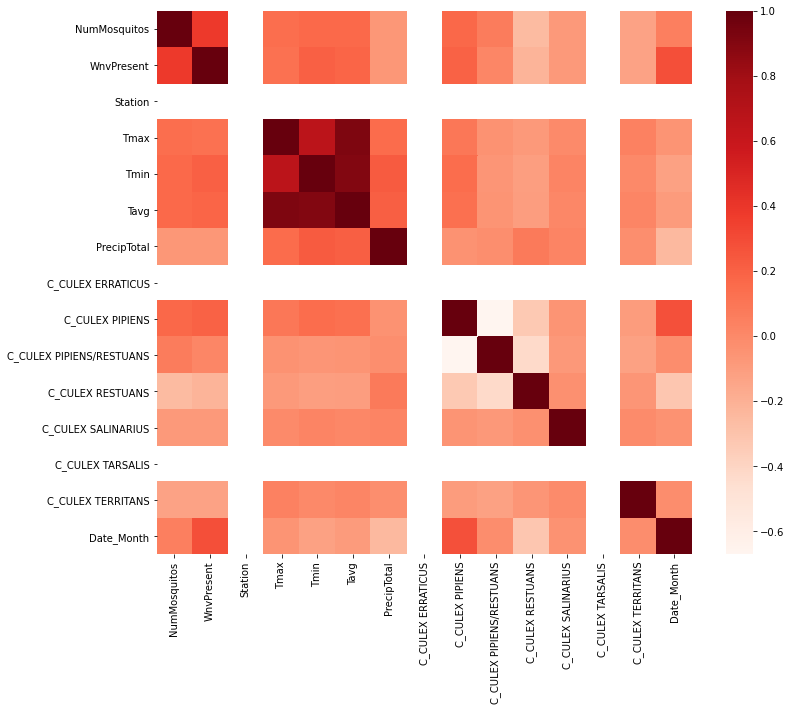

In [102]:
#Correlation plot of the Resampled Data
plt.figure(figsize=(12,10))
sns.heatmap(df_test_under.corr(),cmap ='Reds')
plt.show()

## Conclusion

Present findings show:
- that out of the 10506 mosquitoes  caught, only 551 actually contained the virus, 5% of the actual collections
- majority of the mosquitoes was collected in August 1, 2007
- about 4572 mosquitoes were of CULEX PIPIENS/RESTUANS and out of them, sbout 16% of them contained the West Nile Virus
- Mosquitoes were collected on 95 different day, 138 different location in the city of Chicago

To Explore:
- Which locations in Chicago present the most mosquitoes containing the virus
- Is there a correlation between the weather and viral presence
